In [1]:
import model
import numpy as np
import torch
from torch.nn import functional as F
from Datasets import Modes, ODIR5K
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import models
import pytorch_lightning as pl

In [2]:
model_path = '/odir5k/exps/2-final/swav-r50-epoch=27-odir_score_val=0.837-val_loss=0.929-auc_score_val=0.884.ckpt'
cnn = model.SwavFinetuning.load_from_checkpoint(model_path, classes=8)

Using cache found in /root/.cache/torch/hub/facebookresearch_swav_master


In [3]:
device = 'cuda:1'
cnn = cnn.eval().to(device)

In [4]:
INPUT_IMG = 224

mean = [0.485, 0.456, 0.406]
std = [0.228, 0.224, 0.225]

#build the validation augmentations
trans = []
randomresizedcrop = transforms.RandomResizedCrop(INPUT_IMG)
trans = transforms.Compose([
    randomresizedcrop,
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)])

test_t = trans

odir_test = ODIR5K(Modes.test, test_t)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/venv/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: |          | 0/? [00:00<?, ?it/s]

/venv/lib/python3.6/site-packages/pytorch_lightning/core/step_result.py:145: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  value = torch.tensor(value, device=device, dtype=torch.float)


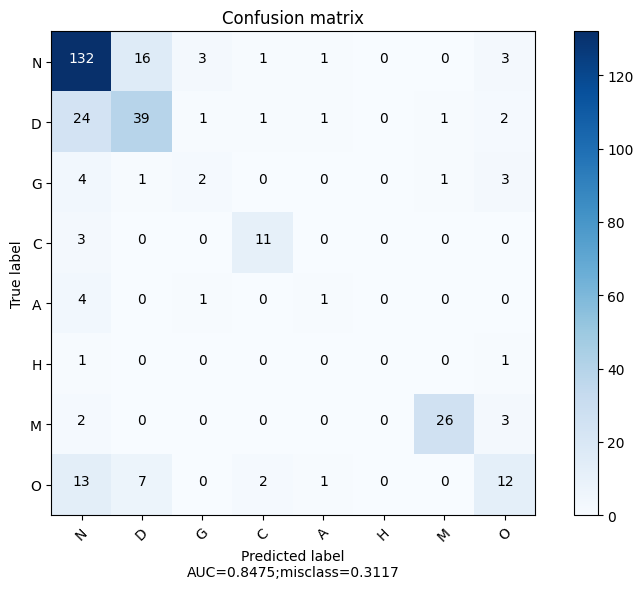

[[132  16   3   1   1   0   0   3]
 [ 24  39   1   1   1   0   1   2]
 [  4   1   2   0   0   0   1   3]
 [  3   0   0  11   0   0   0   0]
 [  4   0   1   0   1   0   0   0]
 [  1   0   0   0   0   0   0   1]
 [  2   0   0   0   0   0  26   3]
 [ 13   7   0   2   1   0   0  12]]
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'auc_score_test': tensor(0.8475, device='cuda:1'),
 'odir_score_test': tensor(0.8276, device='cuda:1'),
 'test_loss': tensor(0.9682, device='cuda:1')}
--------------------------------------------------------------------------------


[{'test_loss': 0.9681521654129028,
  'auc_score_test': 0.8475431203842163,
  'odir_score_test': 0.8276354074478149}]

In [6]:
test_dl = DataLoader(odir_test, batch_size=32) 
trainer = pl.Trainer(gpus=[1])
trainer.test(cnn, test_dl)

In [14]:
test_dl = DataLoader(odir_test, batch_size=32) 

In [16]:
batch = next(iter(test_dl))